In [2]:
import numpy as np


### 1d

In [3]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)


[51 92 14 71 60 20 82 86 74 74]


In [17]:
ind = np.array([0,1,2])[:,np.newaxis]
print(ind)
print(x[ind])

[[0]
 [1]
 [2]]
[[51]
 [92]
 [14]]


In [8]:
ind = np.array([[3, 7], [4, 5]])
print(ind)
print(x[ind])

[[3 7]
 [4 5]]
[[71 86]
 [60 20]]


### 2d

In [4]:
X = rand.randint(10, size=(3, 4))
print(X)

[[7 4 3 7]
 [7 2 5 4]
 [1 7 5 1]]


In [11]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([3, 2, 1])

In [21]:
row = np.random.randint(0, 3, size=10).reshape(5, 2)
col = np.random.randint(0, 4, size=10).reshape(5, 2)
X[row, col]

array([[7, 2],
       [5, 3],
       [7, 7],
       [5, 1],
       [5, 4]])

In [12]:
X[row[:, np.newaxis], col] # broadcasting is done first

array([[3, 4, 7],
       [5, 2, 4],
       [5, 7, 1]])

### combined indexing

In [28]:
X

array([[7, 4, 3, 7],
       [7, 2, 5, 4],
       [1, 7, 5, 1]])

In [22]:
X[2, [2, 0, 1]]

array([5, 1, 7])

In [24]:
#comb with slicing
X[1:, [2, 0, 1]]

array([[5, 7, 2],
       [5, 1, 7]])

In [27]:
#comb with mask
mask = np.array([1, 0, 1, 0], dtype=bool)
row = np.array([0, 1, 2])
X[row[:, np.newaxis], mask]


array([[7, 3],
       [7, 5],
       [1, 5]])

### modifying values

In [36]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
i = [3, 3, 3]
x[i] += 1 # ops are overridden
x

array([6., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [38]:
# ops is reapeated
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]


### Selecting Random Points

In [39]:
mean = [0, 0]
cov = [[1, 2],
[2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape


(100, 2)

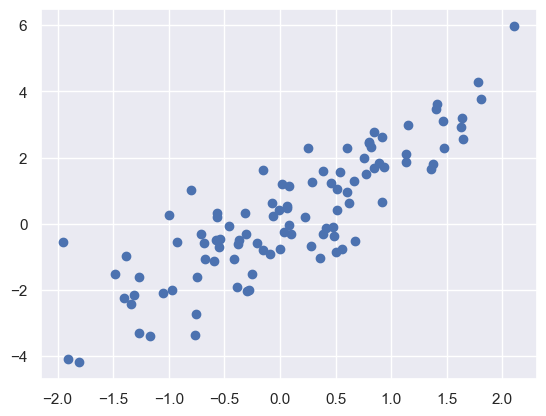

In [41]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set_theme()

plt.scatter(X[:, 0], X[:, 1])

In [42]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 9, 11, 10, 50, 24, 58, 43, 44, 55, 96, 93, 97, 42, 87, 64, 23, 94,
        6,  3, 60])

In [43]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

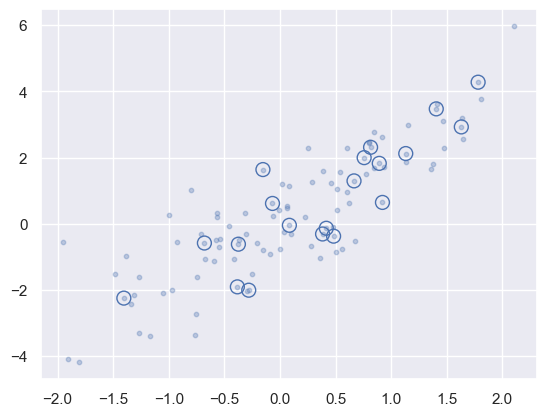

In [53]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, s =10)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=100, edgecolor='b')

### binning data

In [115]:
np.random.seed(42)
x = np.random.randn(100)
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [116]:
# compute a histogram by hand
bins = np.linspace(-5, 5, 21)
print(bins.shape)
bins

(21,)


array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [117]:
counts = np.zeros_like(bins)

In [118]:
print(f"{np.searchsorted(bins, -100) = }")
print(f"{np.searchsorted(bins, 100) = }")
print(f"{np.searchsorted(bins, -5) = }")
print(f"{np.searchsorted(bins, -4.75) = }")
print(f"{np.searchsorted(bins, -4.5) = }")

np.searchsorted(bins, -100) = 0
np.searchsorted(bins, 100) = 21
np.searchsorted(bins, -5) = 0
np.searchsorted(bins, -4.75) = 1
np.searchsorted(bins, -4.5) = 1


In [119]:
# find the appropriate bin for each x, assuming no obs are beyond the largest bin edge
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

print(bins)
print(counts)

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
[ 0.  0.  0.  0.  0.  1.  0.  5. 11. 14. 23. 22. 13.  6.  5.  0.  0.  0.
  0.  0.  0.]


In [120]:
import pandas as pd
df = pd.DataFrame({'bin_start': [-np.Inf]+list(bins[:-1]), 'bin_end': bins, 'count': counts})
df1 = df
df

,bin_start,bin_end,count
0,-inf,-5.0,0.0
1,-5.0,-4.5,0.0
2,-4.5,-4.0,0.0
3,-4.0,-3.5,0.0
4,-3.5,-3.0,0.0
5,-3.0,-2.5,1.0
6,-2.5,-2.0,0.0
7,-2.0,-1.5,5.0
8,-1.5,-1.0,11.0
9,-1.0,-0.5,14.0


In [121]:
len(x[(x > -1.5)&(x<=-1)])

11

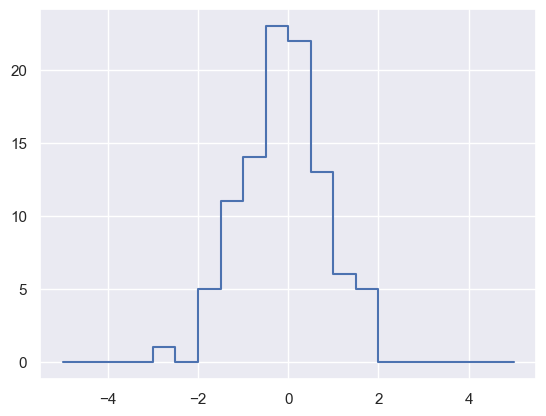

In [122]:
plt.plot(bins, counts, drawstyle='steps')
# steps happen to place the bin edges at the right place


In [123]:
hist, bin_edges = np.histogram(x, bins)
print(hist)
print(bin_edges)

[ 0  0  0  0  1  0  5 11 14 23 22 13  6  5  0  0  0  0  0  0]
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


In [125]:
df = pd.DataFrame({'bin_start': bin_edges[:-1], 'bin_end': bin_edges[1:], 'count': hist})
df2= df
df

,bin_start,bin_end,count
0,-5.0,-4.5,0
1,-4.5,-4.0,0
2,-4.0,-3.5,0
3,-3.5,-3.0,0
4,-3.0,-2.5,1
5,-2.5,-2.0,0
6,-2.0,-1.5,5
7,-1.5,-1.0,11
8,-1.0,-0.5,14
9,-0.5,0.0,23


In [128]:
df1.merge(df2, on=['bin_start', 'bin_end'], suffixes=('_1', '_2'), how='outer')

,bin_start,bin_end,count_1,count_2
0,-inf,-5.0,0.0,NaN
1,-5.0,-4.5,0.0,0.0
2,-4.5,-4.0,0.0,0.0
3,-4.0,-3.5,0.0,0.0
4,-3.5,-3.0,0.0,0.0
5,-3.0,-2.5,1.0,1.0
6,-2.5,-2.0,0.0,0.0
7,-2.0,-1.5,5.0,5.0
8,-1.5,-1.0,11.0,11.0
9,-1.0,-0.5,14.0,14.0
